In [1]:
from selenium import webdriver
from IPython.display import Image, display
import time

In [29]:
# remove str
def removeStr(text, word):
    return "".join(text.split(word))

def getVision(image_url, category="Labels"):
    
    url = 'https://cloud.google.com/vision/'

    # open site
    driver =  webdriver.Chrome()
    driver.get(url)

    # enter iframe
    iframe = driver.find_element_by_css_selector("#vision_demo_section iframe")
    driver.switch_to_frame(iframe)

    # upload image
    driver.find_element_by_id("input").send_keys(image_url)

    # check loading done
    delay = 0
    for _ in range(30):
        if driver.find_element_by_id("results").text != '':
            break
        time.sleep(1)
        delay += 1
    print("Analytics Delay Time : {} sec".format(delay))

    # conditional category
    if category == "Labels":
        driver.find_element_by_css_selector("[data-type=labelAnnotations]").click()
        time.sleep(3)
        result = driver.find_element_by_id("results").text.split("\n")
    elif category == "Web":
        driver.find_element_by_css_selector("[data-type=webDetection]").click()
        time.sleep(3)
        result = driver.find_element_by_id("results").text.split("\n")[1:]
    elif category == "Text":
        driver.find_element_by_css_selector("[data-type=textAnnotations]").click()
        time.sleep(3)
        result = driver.find_element_by_css_selector("#results .text").text
        result = removeStr(result, "“")
        result = removeStr(result, "”")
        result = result.strip()
    
    # close driver
    driver.close()
        
    return result

In [30]:
def showResult(image_url, category):
    result = getVision(image_url, category)
    if category == "Text":
        print(result)
    else:
        print(result[0], result[1], result[2], result[3], result[4])

### Labels

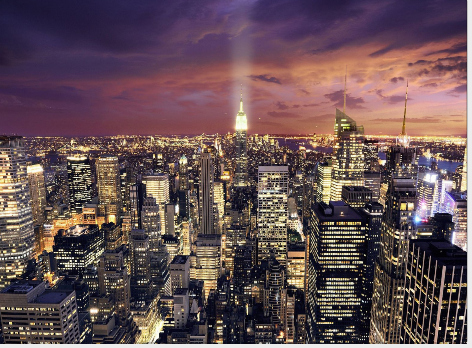

Analytics Delay Time : 6 sec
Metropolitan Area 99% Cityscape 98% City 98% Urban Area 97% Skyline 97%


In [4]:
image_url = '/Users/rada/Desktop/images/newyork.png'
category = 'Labels'
display(Image(filename = image_url))
showResult(image_url, category)

### Web Info

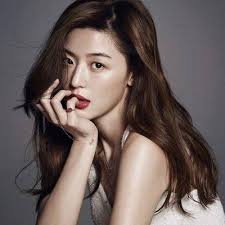

Analytics Delay Time : 3 sec
Jun Ji-hyun 19.9262 South Korea 1.32088 The Legend of the Blue Sea 1.03952 Actor 0.35035 Korean drama 0.331


In [5]:
image_url = "/Users/rada/Desktop/images/jj.jpg"
category = "Web"
display(Image(filename = image_url))
showResult(image_url, category)

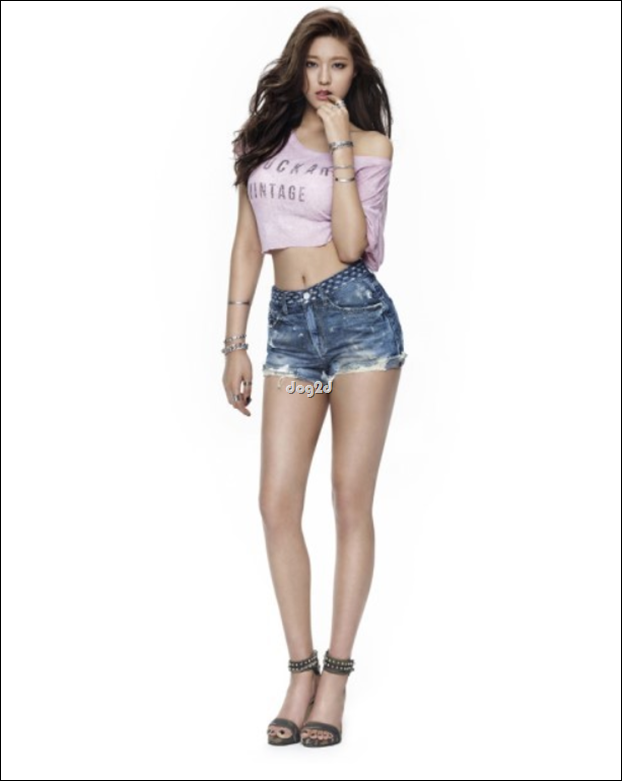

Analytics Delay Time : 5 sec
Seolhyun 18.8912 South Korea 1.50032 AOA 0.71886 Jeans 0.3894 Model 0.38276


In [6]:
image_url = '/Users/rada/Desktop/images/ss.png'
category = "Web"
display(Image(filename = image_url))
showResult(image_url, category)

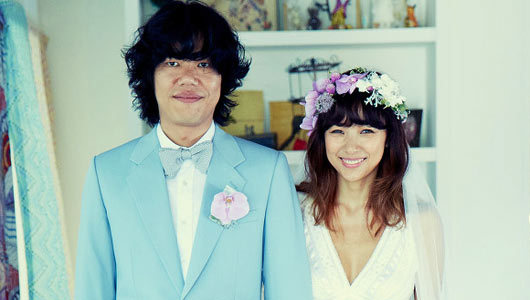

Analytics Delay Time : 4 sec
Lee Hyori 19.8766 Lee Sang-soon 1.41154 South Korea 1.02616 Wedding 0.69662 Beauty and the Beast 0.50548


In [8]:
image_url = '/Users/rada/Desktop/images/ll.jpg'
category = "Web"
display(Image(filename = image_url))
showResult(image_url, category)

### Text

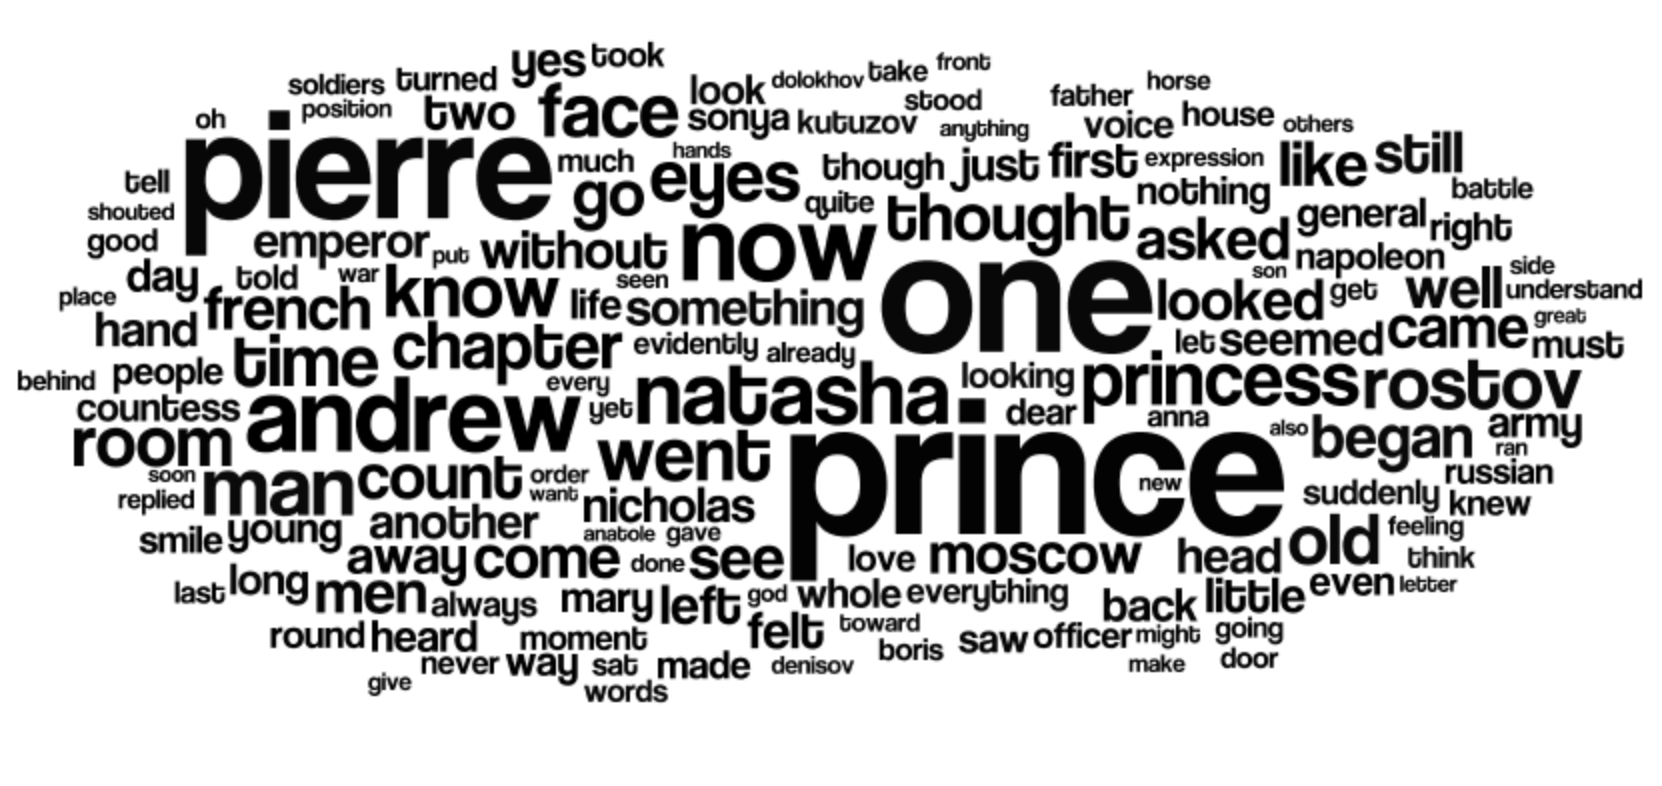

Analytics Delay Time : 7 sec
front turned dolokhov take spoken two face look Sonya Kutuzov anything. voice house others A much more though just first expression like still battle Choose emperor put without NOW we thoughtasked; generalright 'napoleon day, told war place life something Alooked get well understand , let seemed came must behind people natashalokesprincessrosta. Countess yet army room suddenly knew old awayCome done See I love mOSCOW head think last longmiens even letter god wholeeve roundheard moment felt toward saw officermight going boris I never way sat made denisov US words yes took oh horse father stood tell hand trench know time chapter evident already. replied manCount order went smile young another licholas ran make door give


In [31]:
image_url = '/Users/rada/Desktop/images/text1.png'
category = "Text"
display(Image(filename = image_url))
showResult(image_url, category)

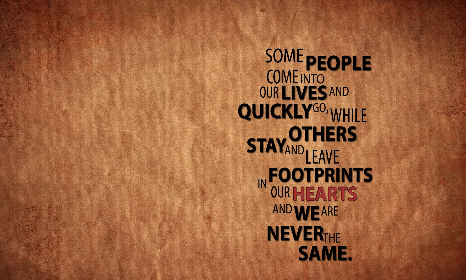

Analytics Delay Time : 5 sec
SOME PEOPLE COMENTS OUR LIVES AND QUICKLY WHILE OTHERS STAY 'LEAVE FOOTPRINTS " OUR HEARTS ANDWEARE NEVERHE SAME


In [32]:
image_url = '/Users/rada/Desktop/images/text2.png'
category = "Text"
display(Image(filename = image_url))
showResult(image_url, category)

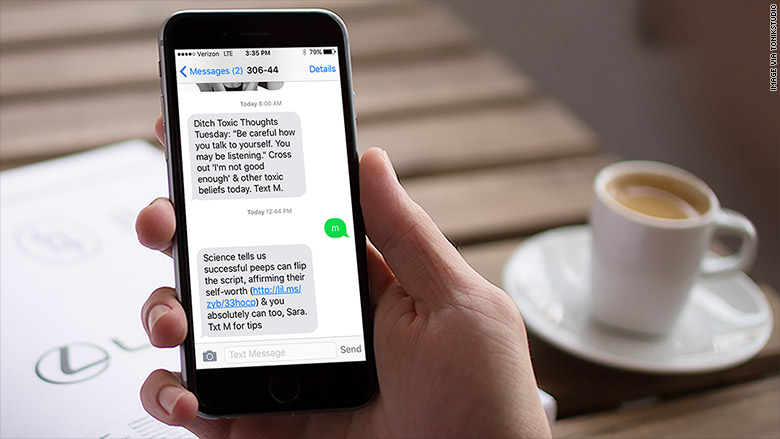

Analytics Delay Time : 4 sec
at Verizon LTE 3:35 PM 3 0 Messages (2) 306-44 Details Today 800 AM Ditch Toxic Thoughts Tuesday: "Be careful how you talk to yourself. You may be listening." Cross Out I'm not good enough & other toxic beliefs today. Text M. Today 124 45 PM Science tells us successful peeps can flip the script, affirming their self-worth (http:INLms/ 233hoco) & you absolutely can too, Sara. Txt M for tips Ol Text Message


In [33]:
image_url = '/Users/rada/Desktop/images/text3.png'
category = "Text"
display(Image(filename = image_url))
showResult(image_url, category)